In [1]:
import os
import pandas as pd
import mlflow
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss

## Model training

In [13]:
iris = load_iris()

In [14]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [15]:
print("X is")
print(X)
print("y is ")
print(y)

X is
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
y is 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=55)

In [17]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
metrics = {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2)}

print(metrics)

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}


In [9]:
coef = classifier.coef_
intercept = classifier.intercept_
params = {'coef':coef, 'intercept': intercept}

print(params)

{'coef': array([[-0.3732739 ,  0.83971977, -2.30651845, -0.98682527],
       [ 0.45814989, -0.20355015, -0.14796719, -0.84917085],
       [-0.08487599, -0.63616962,  2.45448564,  1.83599612]]), 'intercept': array([  9.07493576,   1.76273653, -10.83767229])}


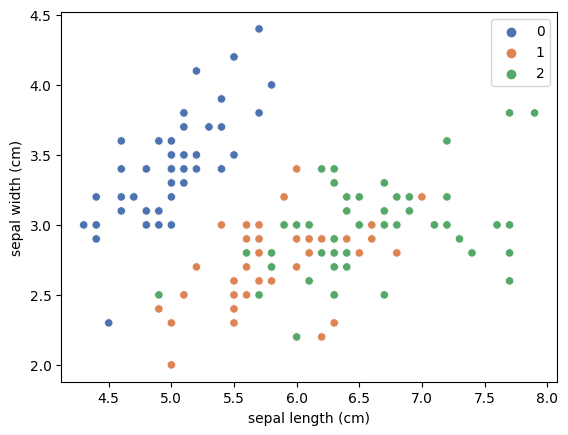

In [10]:
# Create an scatter plot image to be logged as an artifact
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X['sepal length (cm)'], y=X['sepal width (cm)'], hue=y, palette="deep")
plt.savefig('scatter.png')

## MLflow tracking part

In [11]:
mlflow.set_tracking_uri("http://localhost:5000")
experiment_name = "iris_classifier"
run_name="iris_classifier_ver1.0"

run mlflow ui on the Anaconda Prompt first

In [16]:
mlflow.set_experiment(experiment_name)
with mlflow.start_run(run_name=run_name):
    mlflow.log_params(params)
    mlflow.log_metrics(metrics)
    mlflow.log_artifact('./scatter.png')
    mlflow.sklearn.log_model(classifier, "model")
print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

2023/02/13 18:34:13 INFO mlflow.tracking.fluent: Experiment with name 'iris_classifier' does not exist. Creating a new experiment.


Run - iris_classifier_ver1.0 is logged to Experiment - iris_classifier


c:\Users\yanna\anaconda3\envs\mlflow\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## Load logged elements

In [2]:
# Get a list of all experiments
experiments = mlflow.search_experiments()
for exp in experiments:
    print(exp.name)

iris_classifier
Default


In [3]:
# Get info on a specific experiment
experiment_name = "iris_classifier"
mlflow.get_experiment_by_name(experiment_name)


<Experiment: artifact_location='mlflow-artifacts:/964670116452806816', creation_time=1676288053125, experiment_id='964670116452806816', last_update_time=1676288053125, lifecycle_stage='active', name='iris_classifier', tags={}>

In [8]:
# Get a list of runs
runs = mlflow.search_runs(experiment_names=[experiment_name])
runs # a Pandas DataFrame

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.precision,metrics.accuracy,metrics.recall,params.coef,params.intercept,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.log-model.history
0,c35d6853ec1048a09acce6ddf1eb6b41,964670116452806816,FINISHED,mlflow-artifacts:/964670116452806816/c35d6853e...,2023-02-13 11:34:13.297000+00:00,2023-02-13 11:34:17.308000+00:00,1.0,1.0,1.0,[[-0.3732739 0.83971977 -2.30651845 -0.98682...,[ 9.07493576 1.76273653 -10.83767229],LOCAL,c:\Users\yanna\anaconda3\envs\mlflow\lib\site-...,iris_classifier_ver1.0,yanna,"[{""run_id"": ""c35d6853ec1048a09acce6ddf1eb6b41""..."


In [9]:
runs.columns

Index(['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time',
       'end_time', 'metrics.precision', 'metrics.accuracy', 'metrics.recall',
       'params.coef', 'params.intercept', 'tags.mlflow.source.type',
       'tags.mlflow.source.name', 'tags.mlflow.runName', 'tags.mlflow.user',
       'tags.mlflow.log-model.history'],
      dtype='object')

In [6]:
# runs.iloc[0]

run_id                                            c35d6853ec1048a09acce6ddf1eb6b41
experiment_id                                                   964670116452806816
status                                                                    FINISHED
artifact_uri                     mlflow-artifacts:/964670116452806816/c35d6853e...
start_time                                        2023-02-13 11:34:13.297000+00:00
end_time                                          2023-02-13 11:34:17.308000+00:00
metrics.precision                                                              1.0
metrics.accuracy                                                               1.0
metrics.recall                                                                 1.0
params.coef                      [[-0.3732739   0.83971977 -2.30651845 -0.98682...
params.intercept                          [  9.07493576   1.76273653 -10.83767229]
tags.mlflow.source.type                                                      LOCAL
tags

In [10]:
run_id = runs.iloc[0]["run_id"] # run_id of the latest run

In [11]:
# Show artifacts list
client = mlflow.tracking.MlflowClient()
client.list_artifacts(run_id = run_id)

[<FileInfo: file_size=None, is_dir=True, path='model'>,
 <FileInfo: file_size=37379, is_dir=False, path='scatter.png'>]

In [71]:
# Load artifacts
download_path = "C:/Users/yanna/OneDrive/Desktop" # \ is an escape character, so use / instead.
client.download_artifacts(run_id = run_id, path="scatter.png", dst_path = download_path)

C:\Users\yanna\AppData\Local\Temp\ipykernel_13708\1391432819.py:2: FutureWarning: ``mlflow.tracking.client.MlflowClient.download_artifacts`` is deprecated since 2.0. This method will be removed in a future release. Use ``mlflow.artifacts.download_artifacts`` instead.
  client.download_artifacts(run_id = test_run.iloc[0]["run_id"], path="scatter.png", dst_path = download_path)


'C:\\Users\\yanna\\OneDrive\\Desktop\\scatter.png'

In [18]:
# Load a model and make a prediction
logged_model = 'runs:/'+str(run_id)+'/model' # specify model from run id
loaded_model = mlflow.pyfunc.load_model(model_uri=logged_model)
prediction = loaded_model.predict(X_test)
print(prediction)

[0 0 1 1 0 0 0 2 0 0 2 1 1 1 1 0 2 2 1 0 2 2 1 0 2 0 1 1 1 1 1 2 1 2 2 1 2
 2 2 0 0 0 2 0 2]
